### 1) What are the main motivations for reducing a dataset’s dimensionality? - 0.5 points
### What are the main drawbacks? - 0.5 points

In [ ]:
Advantages of reducing datasets dimensionality
To speed up training algorithm (in some cases it can result in removing noise and redundant features, making the training algorithm perform better).
For visualization i.e to visualize the data and gain insights on the most important features. Visualization becomes easy when data is reduced to very low dimensions such as 2D or 3D
Reduce memory/disk needed to store data i.e compression
Reduces overfitting.Overfitting mainly occurs when there are too many variables in the dataset. So, PCA helps in overcoming the overfitting issue by reducing the number of features.

In [ ]:
Drawbacks
It may lead to some amount of data loss.
After performing PCA, original features will turn into Principal Components and are the linear combination of original features. Principal Components are not as readable and interpretable as original features.
PCA tends to find linear correlations between variables, which is sometimes undesirable.
PCA fails in cases where mean and covariance are not enough to define datasets.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score
import time
%matplotlib inline

### Load the MNIST dataset (given below) 


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X = mnist.data

In [4]:
y = mnist.target

In [5]:
X_pd = pd.DataFrame(X)

In [6]:
y_pd = pd.DataFrame(y)

In [7]:
X_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
y_pd.head()

,0
0,5
1,0
2,4
3,1
4,9


In [9]:
X_scale = StandardScaler().fit_transform(X_pd) # PCA is not scale invariant hence scaling the data

In [10]:
X_scale_pd = pd.DataFrame(X_scale)

In [11]:
X_scale_pd.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00409,-0.005328,-0.00378,-0.00378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00378,-0.005766,-0.008565,-0.011368,-0.014649,-0.019199,-0.024465,-0.030164,...,-0.135972,-0.116821,-0.093024,-0.072208,-0.052605,-0.036664,-0.022296,-0.012815,-0.006075,-0.00378,0.0,0.0,0.0,0.0,0.0,0.0,-0.005361,-0.008382,-0.014943,-0.021349,-0.026032,-0.03116,-0.041887,-0.045593,-0.051582,-0.055581,-0.059582,-0.056139,-0.050718,-0.042112,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00409,-0.005328,-0.00378,-0.00378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00378,-0.005766,-0.008565,-0.011368,-0.014649,-0.019199,-0.024465,-0.030164,...,-0.135972,-0.116821,-0.093024,-0.072208,-0.052605,-0.036664,-0.022296,-0.012815,-0.006075,-0.00378,0.0,0.0,0.0,0.0,0.0,0.0,-0.005361,-0.008382,-0.014943,-0.021349,-0.026032,-0.03116,-0.041887,-0.045593,-0.051582,-0.055581,-0.059582,-0.056139,-0.050718,-0.042112,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00409,-0.005328,-0.00378,-0.00378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00378,-0.005766,-0.008565,-0.011368,-0.014649,-0.019199,-0.024465,-0.030164,...,-0.135972,-0.116821,-0.093024,-0.072208,-0.052605,-0.036664,-0.022296,-0.012815,-0.006075,-0.00378,0.0,0.0,0.0,0.0,0.0,0.0,-0.005361,-0.008382,-0.014943,-0.021349,-0.026032,-0.03116,-0.041887,-0.045593,-0.051582,-0.055581,-0.059582,-0.056139,-0.050718,-0.042112,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00409,-0.005328,-0.00378,-0.00378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00378,-0.005766,-0.008565,-0.011368,-0.014649,-0.019199,-0.024465,-0.030164,...,-0.135972,-0.116821,-0.093024,-0.072208,-0.052605,-0.036664,-0.022296,-0.012815,-0.006075,-0.00378,0.0,0.0,0.0,0.0,0.0,0.0,-0.005361,-0.008382,-0.014943,-0.021349,-0.026032,-0.03116,-0.041887,-0.045593,-0.051582,-0.055581,-0.059582,-0.056139,-0.050718,-0.042112,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00409,-0.005328,-0.00378,-0.00378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.00378,-0.005766,-0.008565,-0.011368,-0.014649,-0.019199,-0.024465,-0.030164,...,5.458896,11.214873,2.261153,-0.072208,-0.052605,-0.036664,-0.022296,-0.012815,-0.006075,-0.00378,0.0,0.0,0.0,0.0,0.0,0.0,-0.005361,-0.008382,-0.014943,-0.021349,-0.026032,-0.03116,-0.041887,-0.045593,-0.051582,-0.055581,-0.059582,-0.056139,-0.050718,-0.042112,-0.032951,-0.023387,-0.01675,-0.010638,-0.008339,-0.005342,0.0,0.0,0.0,0.0


### 2) Split it into a training set and a test set
### Take the first 60,000 instances for training, and the remaining 10,000 for testing. - 1 point

In [12]:
X_train = X_scale_pd.iloc[0:60000,:]

In [13]:
X_train.shape

(60000, 784)

In [14]:
X_test = X_scale_pd.iloc[60000:70000,:]

In [15]:
X_test.shape

(10000, 784)

In [16]:
y_train = y_pd.iloc[0:60000,:]
y_test = y_pd.iloc[60000:70000, :]

In [17]:
print(y_train.shape)
print(y_test.shape)

(60000, 1)
(10000, 1)


### 3) Train a Random Forest classifier on the dataset and time how long it takes, - 1 point
### then evaluate the resulting model on the test set. - 1 point

In [18]:
rf=RandomForestClassifier(n_estimators=100)
start = time.time()
rf.fit(X_train,y_train.values.ravel())
stop = time.time()
print(f"Training time in seconds: {stop - start}s") 

Training time in seconds: 43.74654030799866s


In [19]:
pred=rf.predict(X_test)

In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# Accuracy of the model is 97%

### 4) Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. - 2 + 2 points

In [92]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95) #if 0 < n_components < 1, select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components 
data_1=pca.fit_transform(X_scale_pd)

In [56]:
pca.n_components_ # It can be observed that by setting required varaince to 95% number of features are reduced to 332

332

In [57]:
sum(pca.explained_variance_ratio_)

0.9500311796713792

In [50]:
pca_1 = PCA(n_components= 334) # Checking variance by changing n_components it can be observed that for 334 features variance is 95.01%

In [51]:
data_2 = pca_1.fit_transform(X_scale_pd)

In [52]:
print(sum(pca_1.explained_variance_ratio_))

0.9501789743223269


In [93]:
df=pd.DataFrame(data_1)

In [59]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331
0,-0.891720,-4.929711,-0.093038,-8.064180,-0.751001,1.051980,0.283377,1.423696,-1.168523,2.406929,-1.330609,3.269546,3.022839,8.888603,-4.128878,2.254652,8.303377,-4.134214,4.402143,3.921384,-5.164933,0.260673,-2.431289,-2.781884,-2.212005,-2.672388,1.294495,5.017080,0.364979,-0.103957,-3.146816,1.711779,2.128689,2.107822,0.619344,-5.025392,0.864514,0.060800,0.883865,3.658248,...,-0.651052,0.241625,1.707905,1.249879,-0.928440,-0.077113,1.653487,-0.335433,0.497120,0.267314,-0.105362,0.297722,0.873547,-1.760335,1.187746,-1.474289,-0.726226,0.465618,0.429916,-0.656616,-0.102483,0.569796,-0.781345,0.328257,-0.163896,-0.648395,0.128975,-0.635219,-0.102080,0.249711,0.155843,-0.130359,0.791173,0.168495,0.157279,-0.442585,-1.471752,0.301955,0.349144,-0.752368
1,8.813530,-7.517560,-3.714185,-1.766171,0.891472,-5.107950,-0.134795,3.197223,-0.238224,-1.003382,-3.349344,-1.254795,-2.411946,-3.919341,-3.027826,-1.176719,-0.037599,1.468827,3.165507,0.936482,-3.624515,-1.837798,2.539826,0.077271,-1.914550,-0.119093,-1.706681,0.075744,-0.342225,0.260514,1.022326,1.606968,1.567860,-3.660889,-0.894668,-0.008198,-0.948927,-1.184021,0.882179,-1.000315,...,-0.103752,0.392486,-0.285307,0.618808,-0.131727,-0.619418,-0.028074,0.099182,-0.020850,-0.414833,0.543655,0.200647,0.219050,-0.062917,-0.574691,-0.185562,-0.053774,-0.118423,0.022394,-0.231781,0.159026,0.069043,0.056652,0.283836,0.184992,-0.081271,0.250979,0.286398,-0.215919,0.142108,-0.080121,0.143971,-0.075292,-0.054148,-0.328657,-0.097342,-0.277915,-0.066247,-0.316840,-0.180312
2,2.204835,9.824461,-5.752488,1.479673,4.397900,2.507393,18.927843,3.888938,2.443365,-0.145296,-7.377445,2.023420,0.683597,-0.330238,12.261370,9.560811,-4.691458,4.208711,4.465518,4.835956,9.232379,1.210316,-0.253012,-7.499449,-0.765113,-0.255858,3.207874,9.844513,2.167533,2.955643,-3.492020,3.398431,0.952555,-5.161981,0.233282,0.227608,-0.509848,-0.943464,-0.325656,6.115074,...,1.510956,0.019325,0.797093,-1.012156,-0.039252,-0.499276,-0.496772,-0.660710,-0.057071,-0.739862,0.797361,-1.361248,-0.006010,-0.704339,0.952413,0.223143,-0.923926,-0.215935,0.515815,-0.229273,-0.328838,-0.140172,0.275122,0.092775,-0.150415,2.089663,0.416112,0.840605,0.304753,-0.416915,0.333313,0.668359,-1.050376,-0.452535,0.122534,0.702811,1.210336,-1.227017,-0.579337,-0.585607
3,-6.534627,-4.029669,3.524017,-0.218098,5.606259,3.493731,1.445046,-4.683887,-0.613930,-2.533648,-2.276405,3.849409,-0.036696,-3.844612,-0.951812,2.209973,-0.917823,1.564761,-0.131848,-0.155584,-1.819958,-0.547340,-1.036494,-1.961018,1.536018,0.917744,-1.367578,-0.639071,0.991479,-1.049006,-0.348834,-1.436073,-0.542291,-1.614674,1.271152,-0.859385,-0.063320,0.016637,0.580517,-1.146231,...,0.147042,0.081828,-0.458821,-0.253698,-0.221445,0.070159,0.139245,0.297227,0.035695,-0.198597,-0.402531,-0.222471,-0.102962,0.497349,-0.317365,-0.083348,0.339681,-0.003559,0.554188,0.124095,0.129885,-0.148278,0.267446,0.032364,0.097750,-0.023052,-0.001496,-0.086800,-0.142715,0.135044,-0.314217,-0.124090,-0.325576,-0.443792,0.208390,0.067788,-0.004242,0.064486,-0.141908,-0.005184
4,-5.251618,3.278848,-6.182219,1.462658,-1.667989,-0.580801,-0.565828,-3.129538,0.005915,-0.972611,4.690669,0.145346,0.236667,-1.990848,-1.743585,-0.877407,-1.752464,5.607420,0.249852,1.955801,-0.892523,-0.189549,-0.780645,1.477916,-4.034878,-1.375146,-0.483954,-1.224623,-0.765716,-0.119686,0.582360,1.932977,2.551989,-0.907934,-3.326028,3.304077,0.221052,-1.603824,-0.236674,0.920848,...,0.213628,0.607253,0.113240,0.317144,0.306239,-1.265515,-0.180701,-0.055486,0.154955,0.495032,-0.800311,-0.234991,-0.582099,-0.616740,0.644765,0.582902,-0.226976,0.512365,-0.058022,0.390948,0.520445,0.021403,-0.756604,-0.193905,-0.389989,0.370849,0.402171,-1.

In [60]:
df.shape

(70000, 332)

In [94]:
X_train_1 = df.iloc[0:60000,:]
X_test_1 = df.iloc[60000:70000,:]

In [95]:
print(X_train_1.shape)
print(X_test_1.shape)

(60000, 332)
(10000, 332)


### 5)  Train a new Random Forest classifier on the reduced dataset and see how long it takes. - 1 point
### Was training much faster? 

In [96]:
rf = RandomForestClassifier(n_estimators=100)

In [97]:
start = time.time()
rf.fit(X_train_1,y_train.values.ravel())
stop = time.time()
print(f"Training time in seconds: {stop - start}s") 

Training time in seconds: 154.9591429233551s


### 6) Next evaluate the classifier on the test set: how does it compare to the previous classifier? - 1 point

In [98]:
pred_1 =rf.predict(X_test_1)

In [99]:
print(confusion_matrix(y_test, pred_1))

[[ 960    0    1    1    1    5    9    2    1    0]
 [   0 1115    6    1    2    1    6    0    4    0]
 [  10    0  962   16    2    0    7   11   22    2]
 [   1    0   13  949    0    8    2   16   15    6]
 [   2    1    9    1  934    0    6    4    3   22]
 [   6    0    3   41    4  798   10    7   17    6]
 [  10    2    5    1    7   12  918    0    3    0]
 [   1    6   25    7    7    2    0  948    3   29]
 [   7    0   10   24    9   24    5    8  883    4]
 [   7    4    4   20   32    3    0   31    4  904]]


In [101]:
print("Accuracy score of model")
print(accuracy_score(y_test, pred_1))

Accuracy score of model
0.9371


In [68]:
print(classification_report(y_test, pred_1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.92      0.93      0.93      1032
           3       0.89      0.94      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.94      0.91      0.92       892
           6       0.95      0.96      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.94      0.91      0.92       974
           9       0.93      0.90      0.91      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [ ]:
# It can be observed that accuracy for model using reduced number of dimensions is 93.7% which is lesser than accuracy of model using all input features 97%


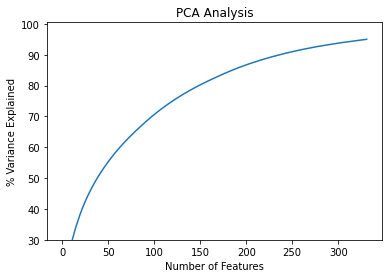

In [69]:
#elbow plot to check the optimal number of features that can explain 95% of the variance in data

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [91]:
# Checking accuracy of model with various number of PCA components
from sklearn.metrics import accuracy_score
for i in range(40,332,30):
  pca=PCA(n_components=i) 
  data_new = pca.fit_transform(X_scale_pd)
  vr = sum(pca.explained_variance_ratio_)
  df=pd.DataFrame(data_new)
  X_train_1 = df.iloc[0:60000,:]
  X_test_1 = df.iloc[60000:70000,:]
  start = time.time()
  rf.fit(X_train_1,y_train.values.ravel())
  stop = time.time()
  #print(f"Training time in seconds: {stop - start}s")
  pred_1 =rf.predict(X_test_1)
  accuracy = accuracy_score(y_test, pred_1)
  print("Number of components :%d, percentage of explained variance : %f, accuracy percentage of model : %f, training time in seconds : %f" % (i, (vr*100.0), (accuracy*100.0),(stop-start)))	

Number of components :40, percentage of explained variance : 50.496279, accuracy percentage of model : 94.370000, training time in seconds : 50.514341
Number of components :70, percentage of explained variance : 62.001397, accuracy percentage of model : 94.540000, training time in seconds : 66.878171
Number of components :100, percentage of explained variance : 70.065963, accuracy percentage of model : 94.350000, training time in seconds : 83.633716
Number of components :130, percentage of explained variance : 76.465736, accuracy percentage of model : 94.260000, training time in seconds : 91.746289
Number of components :160, percentage of explained variance : 81.349467, accuracy percentage of model : 94.420000, training time in seconds : 99.963011
Number of components :190, percentage of explained variance : 85.328414, accuracy percentage of model : 94.270000, training time in seconds : 107.874175
Number of components :220, percentage of explained variance : 88.430799, accuracy percent

In [ ]:
# Observations :
It can be observed that with number of components = 70 , model gives highest accuracy with 94.5% than with model with 332 components
As number of components increases, explained variance increases but training time increases and accuracy of model decreases
Increasing the number of features willnot always improve classification accuracy and might lead to drop in performance
Optimum set of features of lowerdimensionality to improve classification accuracy is n = 70 for this dataset 
